<a href="https://colab.research.google.com/github/Urvi-M/BE559/blob/main/Homework5_part2_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5.2 (28 points)

**Learning objectives:**

In this assignment, we will build a neural network using PyTorch to categorize handwritten digits in the MNIST dataset.

##<font color='green'> PARTS COLORED IN GREEN ARE ESSENTIALLY DONE ALREADY, ALL YOU NEED TO DO IS FOLLOW THROUGH THEM. </font>

---

##<font color='green'> Part 0 </font>

For this assignment, we'll need a bunch of libraries that we've used before.

*   `numpy` (as `np`)
*   `matplotlib.pyplot` (as `plt`)
*   `torch`
*   `torch.nn` (as `nn`)
*   `torch.nn.functional` (as `F`)
*   `torch.utils.data` (as `data`)

Also, from the `torchvision` library, import `datasets` and `transforms`.

As always, now is also a good time to set the default font size to 16.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import datasets, transforms
import torch.utils.data as data

plt.rcParams.update({'font.size': 16})

---

## <font color='green'> Part 1 (1 point) </font>


As in *Homework 5.1*, create a variable `device` that indicates usage of either the system GPU or CPU.  Print `device`.

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


---
## <font color='green'> Part 2 (2 points) </font>

Now, let's load the MNIST data.  The MNIST data is contained within the `datasets` library.  We can load it from there.  But first, we will specify a transform to apply to the data.  The following code will ensure that the data are converted to a tensor upon loading.  It will also do some normlization of image intensity.

`transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])`

*   Create training and testing sets called `mnist_train` and `mnist_test`.  Here is some example code for loading the training set:

`mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)`

*   Create a test set using a similar approach.  Note that this dataset has a flag for toggling between training/testing data.
*   Create dataloaders called `train_loader` and `test_loader` for the two datasets in the same way as in *Homework 5.1*.  Set the `batch_size` parameter to 8.  Also set the parameter `shuffle=True`.



In [ ]:
batchSz = 8
transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = data.DataLoader(mnist_trainset, batch_size=batchSz, shuffle=True)
test_loader = data.DataLoader(mnist_testset, batch_size=batchSz, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 88701095.21it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 5373777.56it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26795810.07it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18300219.76it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



---
## <font color='green'> Part 3 (2 points) </font>

Let's see what our data look like.

*   Load the first entry in the dataset in the same way as in *Homework 5.1* using `next(iter(...))`.  Call it `firstEntry`.  

Each entry in this dataset consists of a `tuple`, rather than two variables.  The `tuple` contains an image of a digit and the integer representation of that digit.

*   Use `plt.show` to view the first image.  You'll have to index into the tuple.  The image contains a singleton dimension and so you will have to use `.squeeze(dim=0)` to remove the first dimension.  Set the `colormap` to 'gray'.
*   Print the integer representation of the digit.


Integer representation of this image:  5


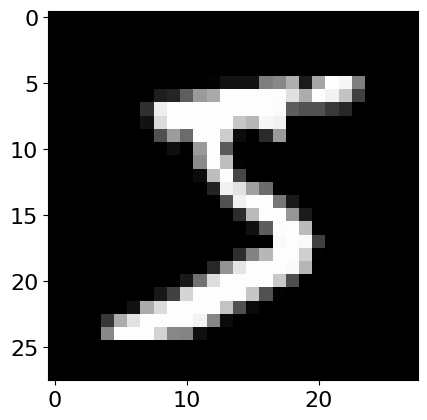

In [ ]:
firstEntry = next(iter(mnist_trainset))

firstImage = firstEntry[0].squeeze(dim=0)
plt.imshow(firstImage, cmap='gray')
print('Integer representation of this image: ', firstEntry[1])


Next, we'll start setting up our network, using the architecture below.  This time, we'll try to do it as simply as possible.

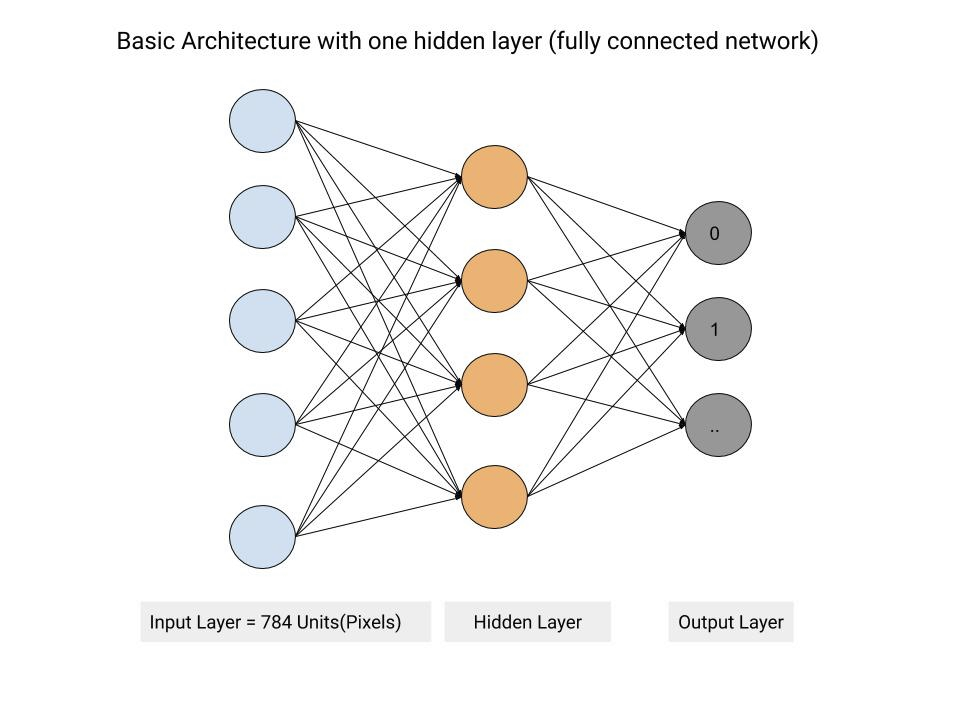

---
## <font color='green'> Part 4 (1 points) </font>

Let's set some values that we'll need to set up our network.

*   Determine the number of rows and columns in the first image.  Save these values as variables `row` and `col`.  
*   Set `sz` equal to the product of `row` and `col`.
*   Set `Classes=10` since we expect there to be 10 possible digits.
*   Set `numHidden=84`, the number of hidden units in our network.
*   Set the learning rate, `lrate`, to 0.01.

In [ ]:
row,col = firstImage.size() # observations , size of image
sz = row*col
classes  = 10
numHidden = 84
lrate = 0.01

---
##Part 5 (5 points)

OK!  Now let's set up our network.  We'll use a simpler approach than in *Homework 5.1* so that we can see multiple ways of using PyTorch.

*   Create a model (called `model`) using `torch.nn.Sequential` to set up a layered neural network.  

The arguments to this function are the elements (modules) of our network, similar to what we used in *Homework 5.1*.  The first element of our network will be a `nn.Linear` module.  The second element will be an activation function module.  We will use the rectified linear unit (`nn.ReLU`) activation function.  The third element will be another `nn.Linear` module.  The inputs to `nn.Linear` are the number of inputs to the layer and the number of units in the layer.  `nn.ReLU` does not have any inputs.


*   Create an optimizer (`optimizer`).  Use stochastic gradient descent for the optimizer with the learning rate you set above.
*   Create a loss function (`loss_func`).  Use the `cross_entropy` loss function included in `F`.

Finally, print your model.  Also, iterate through the model parameters and print them along with their names as in *Homework 5.1*.

Sequential(
  (0): Linear(in_features=784, out_features=84, bias=True)
  (1): ReLU()
  (2): Linear(in_features=84, out_features=10, bias=True)
)
Parameter 0.weight, shape torch.Size([84, 784])
Parameter 0.bias, shape torch.Size([84])
Parameter 2.weight, shape torch.Size([10, 84])
Parameter 2.bias, shape torch.Size([10])


## Part 6 (5 points)

Write a function to train your model.  The inputs to this function should be a model, optimizer, data_loader, and loss function.

This function should do the following:
*   Set the model to training mode
*   Loop over the number of the number of training examples in the dataloader
*   Assign the image data in the training example to a variable `data_inputs` and the labels to a variable `data_labels`.  Send these variables to your `device`.
*   Calculate the predicted labels using your model.
*   Calculate the loss using your loss function and the actual labels (`data_labels`) and predictions.
*  Call `loss.backward` for the backpropagation step, `opt.step` to update weights, and `opt.zero_grad()` to zero the gradients

You will need to remove singleton dimensions from `data_inputs` and reshape it from 8x28x28 to 8x728.  Here is an example:

`       data_inputs = data_inputs.squeeze(dim=1).view(data_inputs.size()[0],data_inputs.size()[2]*data_inputs.size()[3])`.

You will also need to remove singleton dimensions from your prediction.




---
## <font color='green'> Part 7 (2 point) </font>

Let's take a look at our untrained network.

We can retrieve all of the parameters of our model as a dictionary object using:

`state_dict = model.cpu().state_dict()`

The first thing that our network does is transform our input image using a set of weights applied pixel-by-pixel.  The network learns 84 such transformations, corresponding to the 84 hidden units in the network.
*   Display the weights applied to the image to produce the activation of the first three hidden units.

The first set of weights in our network (that produce the activation of the 84 hidden units) can be accessed as:

 `W1 = state_dict['0.weight']`.

The weights that produce the activation of the first hidden unit is then `W1[0,:]`, although they are formatted as a 1-D tensor.  Reshape it to 28x28 pixels and display it using `plt.imshow`.  Do the sme for the second and third units.






In [ ]:
state_dict = model.state_dict()
W1 = state_dict['0.weight']

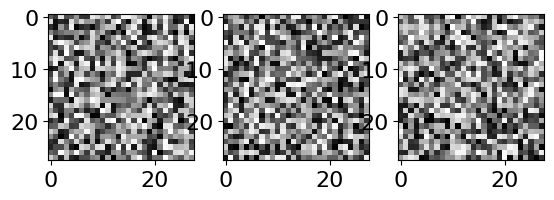

In [ ]:
fig, axs = plt.subplots(1, 3)

axs[0].imshow(W1[0,:].view(28,28), cmap='gray')
axs[1].imshow(W1[1,:].view(28,28), cmap='gray')
axs[2].imshow(W1[2,:].view(28,28), cmap='gray');

These images should just look like noise since we haven't trained our network yet.

---
## <font color='green'> Part 8 (1 points) </font>

Send your model to the `device` and train it.  This might take a minute.

In [ ]:
model.to(device)
train_model(model, opt, train_loader, loss_func)

---
## <font color='green'> Part 9 (1 point) </font>

Let's take a look at our trained network.  Repeat **Part 7** now that the network is trained.  You'll have to send the model back to the cpu to look at it.


In [ ]:
state_dict = model.cpu().state_dict()
W2 = state_dict['0.weight']

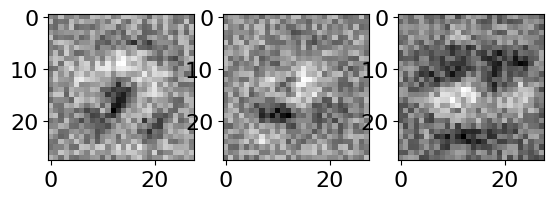

In [ ]:
fig, axs = plt.subplots(1, 3)

axs[0].imshow(W2[0,:].view(28,28), cmap='gray')
axs[1].imshow(W2[1,:].view(28,28), cmap='gray')
axs[2].imshow(W2[2,:].view(28,28), cmap='gray')

---
##Part 10 (4 point)

Now, let's evaluate our network on our test set. Send your model back to `device`.
*   Loop over the entries in `test_loader`.
*   Create `data_inputs` as in your training function
*   Compute your model predictions
*   Keep track of your predictions and the actual data labels for each image.

One way to do the last part is to initialize empty arrays and use `.extend()` to add the values from each batch (converted to numpy arrays) to the array.

---
##Part 11 (1 point)

Calculate the accuracy of your prediction - the number of correctly classified digits divided by the number of testing examples.

Classification accuracy:  0.9548


---
##Part 12 (3 points)

Determine the 'confusion matrix' for your classification.  This is a NxN matrix, where N is the number of classes and each entry is the frequency with which a data point is classified into each class, according to the class to which it actually belongs.  Use `plt.imshow` to display the log2 of this matrix.Add axes labels and a colorbar.

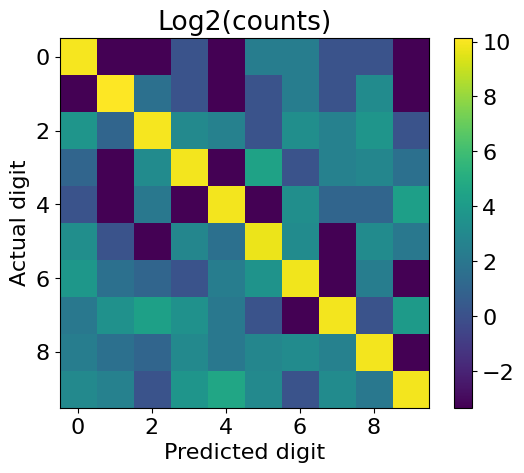